In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from __future__ import division

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

height has been deprecated.



In [3]:
cols = pd.read_csv('columns.csv', sep=';').columns
data = pd.read_csv('ds_interview_dataset.csv', sep = ';', header = None)
data.columns = list(cols)

In [4]:
data['Date of birth'] = pd.to_datetime(data['Date of birth'])
data['First purchase date'] = pd.to_datetime(data['First purchase date'])
data['Date of purchase'] = pd.to_datetime(data['Date of purchase'])
data['VIP'] = data['VIP'].map({'NO':0, 'YES':1})
data['Promo Sign'] = data['Promo Sign'].map({'N':0, 'Y':1})
data['Age'] = (data['Date of purchase']-data['Date of birth']).dt.days/365.25
data['Age'] = data['Age'].fillna(0).astype(int)

In [5]:
def age_group(x):
    if x < 14 or x > 69:
        return 'na'
    elif x>=14 and x<20:
        return '14-19'
    elif x>=20 and x<30:
        return '20-29'
    elif x>=30 and x<40:
        return '30-39'
    elif x>=40 and x<50:
        return '40-49'
    elif x>=50 and x <60:
        return '50-59'
    elif x>=60 and x<70:
        return '60-69'

In [6]:
data['Age_Group'] = data['Age'].map(age_group)

In [7]:
data['YEAR_fst_purchase'] = data['First purchase date'].dt.year
data['MONTH_fst_purchase'] = data['First purchase date'].dt.month
data['LT'] = (data['Date of purchase'].dt.year-data['YEAR_fst_purchase'])*12 - data['MONTH_fst_purchase'] + data['Date of purchase'].dt.month
data['refund'] = (data['Revenue']<0)*1

In [8]:
import datetime

In [9]:
data_12 = data[(data['Date of purchase']>=datetime.date(2016,12,1))] 
data    = data[(data['Date of purchase']< datetime.date(2016,12,1))] 

In [10]:
purchase = data[data.refund != 1] 
refund   = data[data.refund == 1]

In [11]:
year_agg_purchase = purchase.groupby('Customer ID')['Revenue'].agg({'sum', 'mean', 'count'})
year_agg_purchase.columns = ['purchases', 'revenue', 'aov']

year_agg_refund = refund.groupby('Customer ID')['Revenue'].agg({'sum', 'mean', 'count'})
year_agg_refund.columns = ['refunds', 'refund_revenue', 'aov_refund']

In [12]:
year_agg_purchase_promo = purchase.groupby(['Customer ID', 'Promo Sign'])['Revenue'].agg({'sum', 'mean', 'count'})
year_agg_purchase_promo.columns = ['purchases', 'revenue', 'aov']

purchase_promo_pivot = year_agg_purchase_promo.unstack().fillna(0)
ind = pd.Index([str(e[0]) + "_" + 'promo_' + str(e[1])  for e in purchase_promo_pivot.columns.tolist()])
purchase_promo_pivot.columns = ind

year_agg_refund_promo = refund.groupby(['Customer ID', 'Promo Sign'])['Revenue'].agg({'sum', 'mean', 'count'})
year_agg_refund_promo.columns = ['refunds', 'refund_revenue', 'aov_refund']

refund_promo_pivot = year_agg_refund_promo.unstack().fillna(0)
ind = pd.Index([str(e[0]) + "_" + 'promo_' + str(e[1])  for e in refund_promo_pivot.columns.tolist()])
refund_promo_pivot.columns = ind

In [13]:
year_agg_purchase_channel = purchase.groupby(['Customer ID', 'Sales Channel'])['Revenue'].agg({'sum', 'mean', 'count'})
year_agg_purchase_channel.columns = ['purchases', 'revenue', 'aov']

purchase_channel_pivot = year_agg_purchase_channel.unstack().fillna(0)
ind = pd.Index([str(e[0]) + "_"  + str(e[1])  for e in purchase_channel_pivot.columns.tolist()])
purchase_channel_pivot.columns = ind

year_agg_refund_channel = refund.groupby(['Customer ID', 'Sales Channel'])['Revenue'].agg({'sum', 'mean', 'count'})
year_agg_refund_channel.columns = ['refunds', 'refund_revenue', 'aov_refund']

refund_channel_pivot = year_agg_refund_channel.unstack().fillna(0)
ind = pd.Index([str(e[0]) + "_"  + str(e[1])  for e in refund_channel_pivot.columns.tolist()])
refund_channel_pivot.columns = ind

In [14]:
year_agg_purchase_group = purchase.groupby(['Customer ID', 'Product Group'])['Revenue'].agg({'sum', 'mean', 'count'})
year_agg_purchase_group.columns = ['purchases', 'revenue', 'aov']

purchase_group_pivot = year_agg_purchase_group.unstack().fillna(0)
ind = pd.Index([str(e[0]) + "_"  + str(e[1])  for e in purchase_group_pivot.columns.tolist()])
purchase_group_pivot.columns = ind

year_agg_refund_group = refund.groupby(['Customer ID', 'Product Group'])['Revenue'].agg({'sum', 'mean', 'count'})
year_agg_refund_group.columns = ['refunds', 'refund_revenue', 'aov_refund']

refund_group_pivot = year_agg_refund_group.unstack().fillna(0)
ind = pd.Index([str(e[0]) + "_"  + str(e[1])  for e in refund_group_pivot.columns.tolist()])
refund_group_pivot.columns = ind

In [15]:
year_agg_purchase_gender = purchase.groupby(['Customer ID', 'Product Gender'])['Revenue'].agg({'sum', 'mean', 'count'})
year_agg_purchase_gender.columns = ['purchases', 'revenue', 'aov']

purchase_gender_pivot = year_agg_purchase_gender.unstack().fillna(0)
ind = pd.Index([str(e[0]) + "_"  + str(e[1])  for e in purchase_gender_pivot.columns.tolist()])
purchase_gender_pivot.columns = ind

year_agg_refund_gender = refund.groupby(['Customer ID', 'Product Gender'])['Revenue'].agg({'sum', 'mean', 'count'})
year_agg_refund_gender.columns = ['refunds', 'refund_revenue', 'aov_refund']

refund_gender_pivot = year_agg_refund_gender.unstack().fillna(0)
ind = pd.Index([str(e[0]) + "_"  + str(e[1])  for e in refund_gender_pivot.columns.tolist()])
refund_gender_pivot.columns = ind

In [16]:
year_agg_purchase_method = purchase.groupby(['Customer ID', 'Payment Method'])['Revenue'].agg({'sum', 'mean', 'count'})
year_agg_purchase_method.columns = ['purchases', 'revenue', 'aov']

purchase_method_pivot = year_agg_purchase_method.unstack().fillna(0)
ind = pd.Index([str(e[0]) + "_"  + str(e[1])  for e in purchase_method_pivot.columns.tolist()])
purchase_method_pivot.columns = ind

In [17]:
f = {'Age_Group':['last'], 'LT':['max'], 'VIP':['max']}
clients = data.groupby(['Customer ID', 'Gender', 'Income Range']).agg(f)
clients.reset_index(level=['Gender', 'Income Range'], inplace=True)
clients.columns = clients.columns.droplevel(1)
clients_dummy = pd.get_dummies(clients)

In [18]:
def m(x,y):
    return pd.merge(x, y, left_index=True, right_index=True, how='left').fillna(0)

In [19]:
df = m(m(clients_dummy,year_agg_purchase),year_agg_refund)
df = m(m(df,purchase_promo_pivot),refund_promo_pivot)
df = m(m(df,purchase_channel_pivot),refund_channel_pivot)
df = m(m(df,purchase_group_pivot),refund_group_pivot)
df = m(m(df,purchase_gender_pivot),refund_gender_pivot)
df = m(df,purchase_method_pivot)

In [20]:
data['last_purchase_days']=(datetime.date(2016,12,1)-data['Date of purchase']).dt.days

In [21]:
f = {'last_purchase_days':['last']}
lpd = data.sort_values('Date of purchase').groupby(['Customer ID']).agg(f)
lpd.columns = ['last_purchase_days']
df = m(df,lpd)

In [22]:
### target

In [23]:
target_0 = data_12.groupby('Customer ID').agg({'Revenue':['sum']})

In [24]:
target_1 = data_12[data_12['Promo Sign']==1].groupby('Customer ID').agg({'Revenue':['sum']})

In [25]:
target_0['dec_purc'] = 1
target_1['promo_purc'] = 1

In [26]:
target_0.columns = ['total_revenue', 'dec_purchase']
target_1.columns = ['promo_revenue', 'promo_purchase']

In [27]:
target = m(target_0,target_1).fillna(0)

In [28]:
df = m(df,target).fillna(0)

In [29]:
X=df.ix[:,:-4]

In [30]:
Y = df.ix[:, -4:]

In [31]:
y1 = Y['dec_purchase']
y2 = Y['promo_purchase']

In [32]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test  = train_test_split(X, y2, test_size = 0.7, random_state = 42, stratify=y2)

In [33]:
X_train2, X_test2, y_train2, y_test2  = train_test_split(X_test, y_test, test_size = 0.7, random_state = 42, stratify=y_test)

In [34]:
import xgboost as xgb

In [35]:
classifier = xgb.XGBClassifier(seed=42, objective='binary:logistic', max_depth=3, n_estimators=100)
eval_set = [(X_train, y_train), (X_train2,  y_train2)]

In [36]:
%%time
classifier.fit(X_train, y_train, eval_metric='auc', eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.817946	validation_1-auc:0.820397
[1]	validation_0-auc:0.831641	validation_1-auc:0.834097
[2]	validation_0-auc:0.84825	validation_1-auc:0.850714
[3]	validation_0-auc:0.84853	validation_1-auc:0.850776
[4]	validation_0-auc:0.848947	validation_1-auc:0.851385
[5]	validation_0-auc:0.848979	validation_1-auc:0.851349
[6]	validation_0-auc:0.849495	validation_1-auc:0.851999
[7]	validation_0-auc:0.852041	validation_1-auc:0.854177
[8]	validation_0-auc:0.864251	validation_1-auc:0.865161
[9]	validation_0-auc:0.864479	validation_1-auc:0.865342
[10]	validation_0-auc:0.864489	validation_1-auc:0.86535
[11]	validation_0-auc:0.865043	validation_1-auc:0.86583
[12]	validation_0-auc:0.868711	validation_1-auc:0.869704
[13]	validation_0-auc:0.868748	validation_1-auc:0.869763
[14]	validation_0-auc:0.869415	validation_1-auc:0.870405
[15]	validation_0-auc:0.870304	validation_1-auc:0.871109
[16]	validation_0-auc:0.870645	validation_1-auc:0.871431
[17]	validation_0-auc:0.870736	validation_1-a

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=42, silent=True, subsample=1)

In [37]:
def auc_plot(y_test, preds):
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve(y_test.values.ravel(), preds)
    roc_auc = metrics.auc(fpr,tpr)

    # Plot ROC
    plt.title('ROC')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

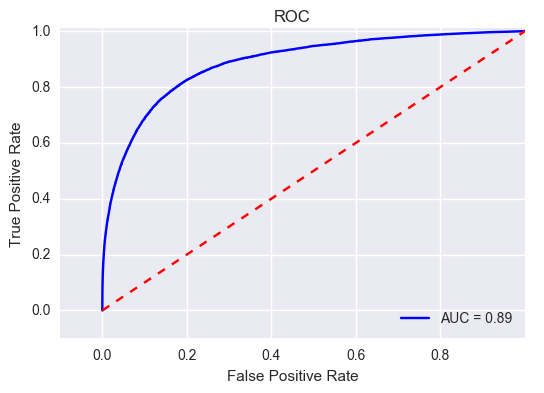

In [38]:
auc_plot(y_train2, classifier.predict_proba(X_train2)[:,1])

In [39]:
promo_pp = pd.DataFrame(classifier.predict_proba(X_test))
promo_pp.columns = ['no_promo','promo_pp']
promo_pp['id'] = y_test.index.values
promo_pp.index = promo_pp.id
promo_pp.drop('id', axis = 1, inplace = True)

In [40]:
promo_df = m(promo_pp, Y[['promo_revenue','promo_purchase']])

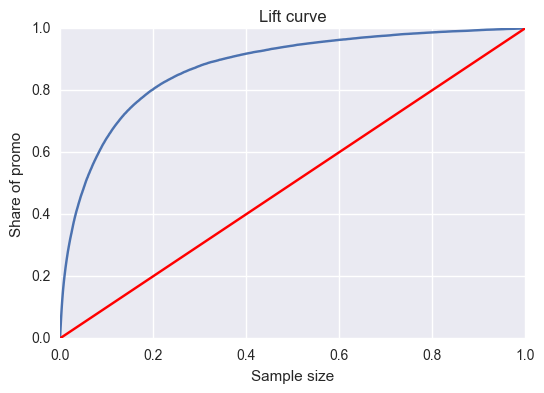

In [41]:
x = [x/(len(promo_df)+1) for x in range(1,len(promo_df)+1)]
promo_df['promo_cumsum'] = promo_df.sort_values('promo_pp', ascending=False)['promo_purchase'].cumsum()
y = promo_df.sort_values('promo_pp', ascending=False)['promo_cumsum'].values / promo_df.promo_cumsum.max()

plt.plot(x, y);
plt.plot(x, x, 'r');
plt.title('Lift curve')
plt.xlabel('Sample size');
plt.ylabel('Share of promo');

In [42]:
promo_df['cost'] = -5
promo_df['cost_cumsum'] = promo_df.sort_values('promo_pp', ascending=False)['cost'].cumsum()
promo_df['promo_revenue_cumsum']=promo_df.sort_values('promo_pp', ascending=False)['promo_revenue'].cumsum()
promo_df['profit'] = promo_df['promo_revenue_cumsum']*0.3 + promo_df['cost_cumsum']
promo_df['profit_3'] = promo_df['promo_revenue_cumsum']*0.3 + promo_df['cost_cumsum']*3
promo_df['profit_10'] = promo_df['promo_revenue_cumsum']*0.3 + promo_df['cost_cumsum']*10
promo_df['profit_20'] = promo_df['promo_revenue_cumsum']*0.3 + promo_df['cost_cumsum']*20

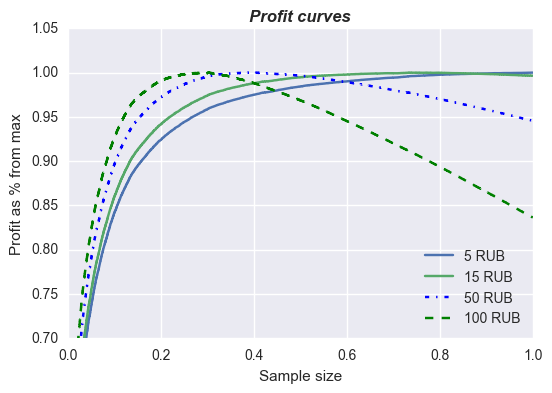

In [43]:
r = promo_df.sort_values('promo_pp', ascending=False)['profit'].values 
r3 = promo_df.sort_values('promo_pp', ascending=False)['profit_3'].values 
r10= promo_df.sort_values('promo_pp', ascending=False)['profit_10'].values 
r20= promo_df.sort_values('promo_pp', ascending=False)['profit_20'].values 

plt.plot(x, r/r.max());
plt.plot(x,r3/r3.max());
plt.plot(x,r10/r10.max(), 'b-.');
plt.plot(x,r20/r20.max(), 'g--');
#plt.plot(x, [0]*len(x), 'r')
plt.title('Profit curves', fontstyle='italic', fontweight='bold');
plt.xlabel('Sample size');
plt.ylabel('Profit as % from max');
plt.ylim((0.7, 1.05))
#plt.scatter( r.argmax()/len(promo_df), r.max())
plt.legend(['5 RUB', '15 RUB', '50 RUB', '100 RUB'], loc = 'lower right')

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X_train2, y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

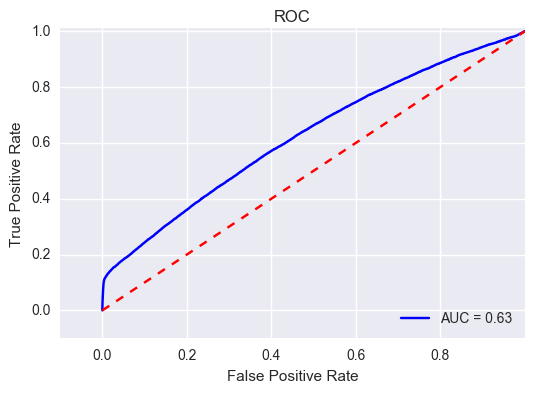

In [47]:
auc_plot(y_train2, lr.predict_proba(X_train2)[:,1])

In [50]:
promo_pp_lr = pd.DataFrame(lr.predict_proba(X_test))
promo_pp_lr.columns = ['no_promo','promo_pp']
promo_pp_lr['id'] = y_test.index.values
promo_pp_lr.index = promo_pp_lr.id
promo_pp_lr.drop('id', axis = 1, inplace = True)

In [51]:
promo_df_lr = m(promo_pp_lr, Y[['promo_revenue','promo_purchase']])

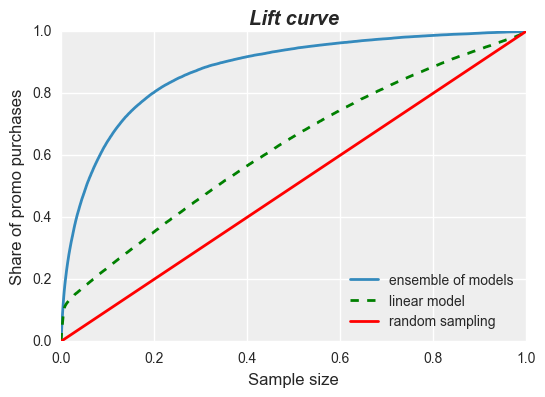

In [52]:
plt.style.use(['bmh'])
x = [x/(len(promo_df)+1) for x in range(1,len(promo_df)+1)]
promo_df['promo_cumsum'] = promo_df.sort_values('promo_pp', ascending=False)['promo_purchase'].cumsum()
y = promo_df.sort_values('promo_pp', ascending=False)['promo_cumsum'].values / promo_df.promo_cumsum.max()

promo_df_lr['promo_cumsum'] = promo_df_lr.sort_values('promo_pp', ascending=False)['promo_purchase'].cumsum()
y2 = promo_df_lr.sort_values('promo_pp', ascending=False)['promo_cumsum'].values / promo_df_lr.promo_cumsum.max()


plt.plot(x, y);
plt.plot(x, y2, 'g--');
plt.plot(x, x, 'r');
plt.title('Lift curve', fontstyle='italic', fontweight='bold')
plt.xlabel('Sample size');
plt.ylabel('Share of promo purchases');
plt.legend(['ensemble of models', 'linear model', 'random sampling'], loc = 'lower right' );


In [53]:
fi = pd.DataFrame(zip(list(X_train2.columns), list(classifier.feature_importances_)), columns=['Feature','importance'])

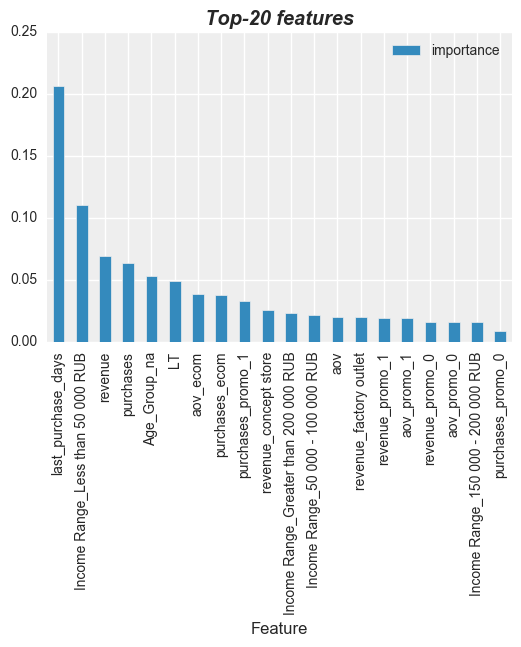

In [54]:
plt.style.use(['bmh'])

fi.ix[fi.importance>0].sort_values('importance', ascending=False)[:20].plot(kind='bar', x='Feature');
plt.title('Top-20 features', fontstyle='italic', fontweight='bold');
#plt.xticks(rotation=45)